# COGS 118A - Project Checkpoint

# Names

- Neil Bajaj
- Pratheek Sankeshi
- Shenova Davis
- Ria Singh


# Abstract 
The goal of this project is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. We will predict using a machine learning algorithm. The data we will be using is from the Kaggle dataset: A Credit Card Dataset for Machine Learning. The link is https://www.kaggle.com/datasets/caesarmario/application-data/. We will be using factors such as Total Income, Education Type, Applicant Age, etc. More will be described in the data section. Furthermore, we will drop unnecessary columns like Owned Phone, Owned Email, etc while also replacing null values to perform EDA. We will then run various supervised machine learning algorithms to create models to predict the data and use the best one. The performance will be measured on how accurately we predict the data against the status column of the data which is whether the application was approved or not. 


# Background

As we get deeper into the age of Big Data, we see that, where possible, we are attempting to move from human evaluation to machine learning prediction. There has also been an uptick in the number of credit card defaulters. Using this logic, credit card companies need a new way to decide whether or not to approve credit cards based on prior history. 

A previous study done by Dr. Hemkiran[1] evaluated whether applicants should be approved for a credit card by using a Logistic Regression with and without a grid search technique. They found that using a grid search technique improved the competency of their model. Additionally, they also used an Artificial Neural Network (ANN) and found it to be better than the linear regression model. Another study by Dr. Kibria[2] aimed to create a deep learning model to aid credit card approval decision-making. They also used a logistic regression model and a support vector machine (SVM) model to compare their results. They found that the deep learning model was better than the logistic regression and SVM models. However, the ANN model and deep learning model are more computationally expensive and time-consuming. 

We are attempting to create a predictive machine learning model that models whether or not the application has the right credentials to have their credit card application approved using the following variables: Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type, and Family Status. This is to avoid future credit card defaulters. We will use models such as Naive Bayes Classifier, Linear SVM, and Linear Regression and use them to compare our model’s performance as well. 


# Problem Statement

We are building this model to measure if there are any discrepancies when approving credit card applications. We additionally want to check if we could use big data and machine learning to build a model that predicts if a credit card is approved or not. This would take out human bias from the equation and make sure every application is fairly reviewed. Creating a machine learning model will attempt to eliminate the human bias towards race, class, gender, etc - an issue that plagues the financial ratings of individuals. Additionally, a machine-learning system can significantly reduce the human power and costs of a credit card company, increasing revenue. If our model can accurately predict whether an application can be accepted, we could conclude our hypothesis. This problem is quantifiable since we are trying to model a binary predictor. This problem is measurable because we would be using the metric of accuracy to validate the performance of our model. Lastly, our model is replicable because we could run it on different datasets and check its accuracy on each dataset. The model we will create will be composed of supervised machine-learning algorithms and techniques such as logistic regression, linear SVM, K fold validation, etc. We will train our model on previously collected data from credit card companies to understand what attributes make an individual more or less likely to get approved for a credit card. 


# Data


- Link for our data: https://www.kaggle.com/datasets/caesarmario/application-data

- This data set has about 25,100 observations with 21 variables. 

- The variables that will be used are Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type, and Family Status. 

- The dataset we are using has already been cleaned to drop any data points with null values and yet the dataset remains robust so we will not be addressing it any further.

- We will additionally drop all the features that we will not be using to further declutter the dataset.

- In addition to cleaning we one hot encoded all other categorical data which wasn't already binary which is displayed below



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns    
from matplotlib.pyplot import figure
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#models importing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

#linear svm stuff
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.kernel_ridge import KernelRidge

In [2]:
credit  = pd.read_csv('Application_Data.csv')
credit.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [3]:
status = credit['Status']
status_0_len = len(status[status==0])
status_1_len = len(status[status==1])
print(status_0_len/len(status))

0.004815345431391276


In [4]:
#note: we noticed here that the datset mainly leading to approving the credit card, we cannot use a regualr model
# because the best one would be just approving the credit card application every time. 

#we need to find a model that takes care of imbalanced data and looking fo that we found pyCaret. 
#we could also use scikit learn for this. 

#SMOTE
#ADASYN

'''
MODELS TO USE 
- LOGISTIC REGRESSION / CLASSIFIER 
- ADA BOOST 
- GRADIENT BOOST 
- RANDOM FOREST 
- SVM ?
'''

'\nMODELS TO USE \n- LOGISTIC REGRESSION / CLASSIFIER \n- ADA BOOST \n- GRADIENT BOOST \n- RANDOM FOREST \n- SVM ?\n'

In [5]:
credit.dtypes

Applicant_ID             int64
Applicant_Gender        object
Owned_Car                int64
Owned_Realty             int64
Total_Children           int64
Total_Income             int64
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int64
Owned_Work_Phone         int64
Owned_Phone              int64
Owned_Email              int64
Job_Title               object
Total_Family_Members     int64
Applicant_Age            int64
Years_of_Working         int64
Total_Bad_Debt           int64
Total_Good_Debt          int64
Status                   int64
dtype: object

In [6]:
#first we will only keep columns that we need. These columns are covered under Data along with 
#status which says whether or not it was approved
credit = credit[["Applicant_Gender", "Applicant_Age","Owned_Realty",
                 "Total_Children", "Owned_Car", "Total_Income", "Housing_Type",
                 "Total_Family_Members", "Education_Type", "Family_Status", 'Status']]

In [7]:
credit.dtypes

Applicant_Gender        object
Applicant_Age            int64
Owned_Realty             int64
Total_Children           int64
Owned_Car                int64
Total_Income             int64
Housing_Type            object
Total_Family_Members     int64
Education_Type          object
Family_Status           object
Status                   int64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(credit.drop('Status', axis=1), #
                                                    credit['Status'], #Y variable target
                                                    train_size=0.8,
                                                    random_state=123)
categorical_features = ["Applicant_Gender", "Housing_Type", "Education_Type", "Family_Status"]

In [ ]:
#THE CODE IN THE CELL BELOW USES SMOTE TO FIX DATA IMBALANCES 
# OUR DATAPOINTS WENT FROM 20K IN THE TRAINSET TO 40K IN THE TRAINSET 
#we have shifted our status to the y_test and y_train because that is what we are going to compare with 

In [11]:
from imblearn.over_sampling import SMOTE
X_train = X_train.drop(columns = ["Housing_Type", "Family_Status","Education_Type", "Applicant_Gender"])
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [12]:
print(len(X_res)) #length of our new dataset

40004


In [13]:
X_res.head()

,Applicant_Age,Owned_Realty,Total_Children,Owned_Car,Total_Income,Total_Family_Members
0,52,0,0,0,112500,2
1,35,0,1,0,135000,3
2,31,1,1,1,157500,3
3,55,0,0,0,135000,1
4,38,0,0,0,180000,2


In [16]:
# REPEATED K FOLD CROSS VALIDATION 
# 25 FOLDS FOR EACH OF THE 3 CANDIDATES - TOTALLING 75 FITS

# Import here
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

params ={'C':[0.01, 0.05, 10]}
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state = 42)

clf1 = GridSearchCV(LogisticRegression(), params, cv = rkf, n_jobs=-1, verbose = 3)


#i think we have to fit something here
#clf1.fit(X_train, y_train)
clf1.fit(X_res, y_res)
# View the Grid Search CV Results
print((clf1.cv_results_))

Fitting 25 folds for each of 3 candidates, totalling 75 fits
{'mean_fit_time': array([0.05615684, 0.05479515, 0.05593369]), 'std_fit_time': array([0.0331982 , 0.02860824, 0.03188319]), 'mean_score_time': array([0.0035039 , 0.00479506, 0.00395033]), 'std_score_time': array([0.00068437, 0.00189001, 0.00113539]), 'param_C': masked_array(data=[0.01, 0.05, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.05}, {'C': 10}], 'split0_test_score': array([0.47806524, 0.47806524, 0.47806524]), 'split1_test_score': array([0.50006249, 0.50006249, 0.50006249]), 'split2_test_score': array([0.48781402, 0.48781402, 0.48781402]), 'split3_test_score': array([0.50518685, 0.50518685, 0.50518685]), 'split4_test_score': array([0.489, 0.489, 0.489]), 'split5_test_score': array([0.50443695, 0.50443695, 0.50443695]), 'split6_test_score': array([0.55943007, 0.55980502, 0.55993001]), 'split7_test_score': array([0.50356205, 0.50356205, 0.

In [15]:
print(type(clf1.cv_results_))

<class 'dict'>


In [19]:
# NORMAL K FOLD CROSS VALIDATION SPLITS =25 


from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV

params = {'C': [0.01, 0.5, 10]}

kf = KFold(n_splits = 25)
clf2 = GridSearchCV(LogisticRegression(), params, cv = kf)

clf2.fit(X_res, y_res)

# View the Grid Search CV Results
print(clf2.cv_results_)

{'mean_fit_time': array([0.01869437, 0.01666233, 0.01571007]), 'std_fit_time': array([0.00753548, 0.00628558, 0.00544591]), 'mean_score_time': array([0.00148239, 0.00136434, 0.00125566]), 'std_score_time': array([4.51184040e-04, 1.55166110e-04, 8.68692088e-05]), 'param_C': masked_array(data=[0.01, 0.5, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.5}, {'C': 10}], 'split0_test_score': array([0.00374766, 0.00374766, 0.00374766]), 'split1_test_score': array([0.00562149, 0.00562149, 0.00562149]), 'split2_test_score': array([0.00249844, 0.00249844, 0.00249844]), 'split3_test_score': array([0.00437227, 0.00437227, 0.00437227]), 'split4_test_score': array([0.004375, 0.004375, 0.004375]), 'split5_test_score': array([0.005, 0.005, 0.005]), 'split6_test_score': array([0.00375, 0.00375, 0.00375]), 'split7_test_score': array([0.006875, 0.006875, 0.006875]), 'split8_test_score': array([0.01, 0.01, 0.01]), 'split9_test

In [20]:
# COMPARING THE TWO MODELS WE JUST RAN TO SEE WHICH MODEL RETURNS A BETTER ACCUARACY ON OUR DATASET

clfi1Mat = np.zeros((25,3))
clfi2Mat = np.zeros((25,3))
i = 0
for key in clf1.cv_results_.keys():
    if 'split' in key:
        clfi1Mat[i] = clf1.cv_results_[key]
        clfi2Mat[i] = clf2.cv_results_[key]
        i += 1
#print(clfi1Mat.shape)
#print(clfi2Mat)#so we go 

#next we have to get 9 different arrays for each c value
clfi1MatC1 = clfi1Mat[:, 0] #go by column
clfi2MatC1 = clfi2Mat[:, 0]
print(clfi2MatC1)
clfi1MatC2 = clfi1Mat[:, 1] #go by column
clfi2MatC2 = clfi2Mat[:, 1]

clfi1MatC3 = clfi1Mat[:, 2] #go by column
clfi2MatC3 = clfi2Mat[:, 2]



[0.00374766 0.00562149 0.00249844 0.00437227 0.004375   0.005
 0.00375    0.006875   0.01       0.005      0.006875   0.0025
 0.520625   0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [21]:
#ACCUARACY OF EACH COMBINATION OF OUR MODEL 
# MAXIMUM AXXURACY ACHIEVED HERE IS 55.9% WHICH ISNT GREAT AND IS WORSE THAN OUR BASELINE 
#HENCE WE NEED TO TRY OTHER MODELS

print(max(clfi1MatC1))
print(max(clfi1MatC2))
print(max(clfi1MatC3))
print(max(clfi2MatC1))
print(max(clfi2MatC2))
print(max(clfi2MatC3))


0.5594300712410949
0.5598050243719535
0.5599300087489064
0.520625
0.520625
0.520625
[CV 4/25] END ...........................C=0.01;, score=0.505 total time=   0.0s
[CV 10/25] END ..........................C=0.01;, score=0.487 total time=   0.1s
[CV 19/25] END ..........................C=0.01;, score=0.479 total time=   0.1s
[CV 2/25] END ...........................C=0.05;, score=0.500 total time=   0.1s
[CV 9/25] END ...........................C=0.05;, score=0.497 total time=   0.0s
[CV 14/25] END ..........................C=0.05;, score=0.506 total time=   0.0s
[CV 18/25] END ..........................C=0.05;, score=0.495 total time=   0.1s
[CV 1/25] END .............................C=10;, score=0.478 total time=   0.1s
[CV 6/25] END ...........................C=0.01;, score=0.504 total time=   0.0s
[CV 9/25] END ...........................C=0.01;, score=0.497 total time=   0.0s
[CV 12/25] END ..........................C=0.01;, score=0.489 total time=   0.1s
[CV 21/25] END ..........

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


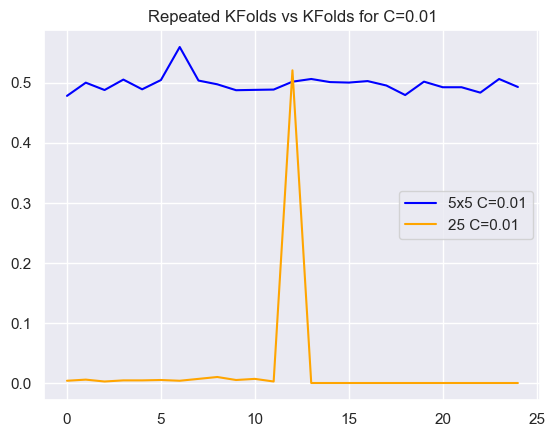

In [22]:
# PLOT FOR OUR REPEATED K - FOLDS AND OUR K FOLD CROSS VALIDATION MODELS 
# WE CAN SEE THAT OUR REPEATED K FOLDS PERFORMS SIGNIFICANTLY BETTER 

#next we have to do 3 plots
xVals = np.arange(25)
print(xVals)
plt.plot(xVals, clfi1MatC1, color = 'blue', label = "5x5 C=0.01")
plt.plot(xVals, clfi2MatC1, color = 'orange', label = "25 C=0.01")
plt.title("Repeated KFolds vs KFolds for C=0.01")
plt.legend()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


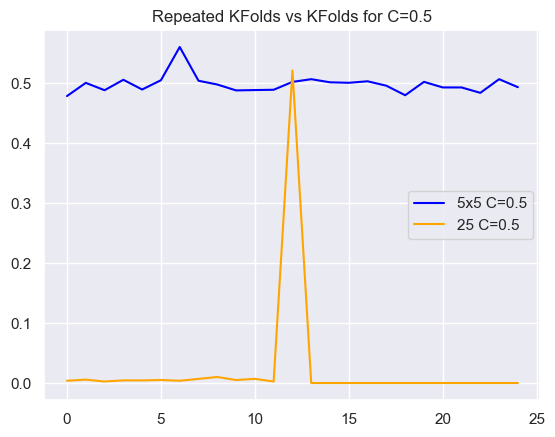

In [23]:
# PLOT FOR OUR REPEATED K - FOLDS AND OUR K FOLD CROSS VALIDATION MODELS 
# WE CAN SEE THAT OUR REPEATED K FOLDS PERFORMS SIGNIFICANTLY BETTER 


#next we have to do 3 plots
xVals = np.arange(25)
print(xVals)
plt.plot(xVals, clfi1MatC2, color = 'blue', label = "5x5 C=0.5")
plt.plot(xVals, clfi2MatC2, color = 'orange', label = "25 C=0.5")
plt.title("Repeated KFolds vs KFolds for C=0.5")
plt.legend()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


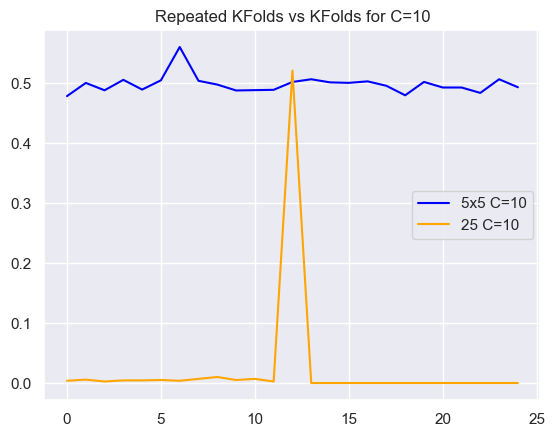

In [24]:
# PLOT FOR OUR REPEATED K - FOLDS AND OUR K FOLD CROSS VALIDATION MODELS 
# WE CAN SEE THAT OUR REPEATED K FOLDS PERFORMS SIGNIFICANTLY BETTER 


#next we have to do 3 plots
xVals = np.arange(25)
print(xVals)
plt.plot(xVals, clfi1MatC3, color = 'blue', label = "5x5 C=10")
plt.plot(xVals, clfi2MatC3, color = 'orange', label = "25 C=10")
plt.title("Repeated KFolds vs KFolds for C=10")
plt.legend()

In [26]:
#NO NUMM VALUES IN OUR DATA - JUST A CHECK 

#next we check for nulls and nans and if there exists any we will count them
#and decide to drop the row containing that datapooint

credit.isnull().values.any()
#so there isnt any nan values so we dont need to replace any values anywhere

False

In [27]:
#next is making all columns which arent numerical numerical
#first we will check which columns arent numerical
credit.dtypes

Applicant_Gender        object
Applicant_Age            int64
Owned_Realty             int64
Total_Children           int64
Owned_Car                int64
Total_Income             int64
Housing_Type            object
Total_Family_Members     int64
Education_Type          object
Family_Status           object
Status                   int64
dtype: object

In [29]:
# IMPORTANT CODE - DROPPING COLUMNS WE DO NOT NEED (OF TYPE FLOAT AND DOESNT MAKE SENSE TO CONVERT USING ONE HOT ENCODING)

X_test = X_test.drop(columns = ['Applicant_Gender', 'Housing_Type', 'Education_Type','Family_Status'])


In [30]:
# JUST A LOGISTIC CLASSIFIER - NO K FOLD OR REPEATED K FOLD USED HERE
# ACCUARACY ACHIEVED WAS 58.27% WHICH IS BETTER BUT STILL NOT GOOD ENOUGH 
# L2 PENALTY USED 


#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

0.5827695980899323


In [32]:
#SAME AS ABOVE BUT NOW USING A L1 PENALTY 
# NOTICE THIS DOES NOT RUN WITH A L1 PENALTY 
# NOT NEEDED

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(C = 1, random_state=0, penalty = "l1").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

0.5827695980899323


In [33]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS NEWTON CG 
#OUR ACCUARACY IS SIGNIFIANTLY IMPROVED - NOW OUR ACCUARACY IS 64.8%

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='newton-cg', C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py

0.6480302427377637


/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [35]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS LIBLINEAR 
#OUR ACCUARACY USING LIBLINEAR IS 62.7%

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='liblinear', C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

0.6273378432152805


In [43]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS saga 
# TERRIBLE MODEL DID NOT CONVERGE 

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='sag', C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

0.004178272980501393


/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
#NOW TRYING TO USE SVM 

#SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from mlxtend.plotting import plot_decision_regions



In [ ]:
#LINEAR SVM TAKING TOO LONG TO RUN 
#RADIAL SVM (RBF) GIVING SOME STUPID ERROR


# Define and Fit your Model
model = SVC(kernel='rbf', C=1000)
model.fit(X_res, y_res)

# Plot the Data and the Decision Boundary
plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, s=50, cmap='Spectral')
plot_svc_decision_function(model)


In [ ]:
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

onehot = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)])


# Create a pipeline 
pipe = Pipeline([('make_features', preprocessor),
                 ('classifier', LogisticRegression(solver='saga', max_iter=10000))])

# Create search space of hyperparameters
# the variable namespace looks like this
# pipe.classifier.C is represented as 'classifier__C'
# if we'd just chucked a LogisticRegression() in as the model
# instead of a pipe, then we'd only have had 'C' w/o the 'classifier__' bit 
search_space = {'classifier__C': np.logspace(-4, 4, 9),
               'classifier__penalty': ['l2', 'l1']}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3)

In [ ]:
#NO CODE BELOW THIS IS NEEDED - DELETE

# Proposed Solution

Our proposed solution to predicting whether individuals get approved for a credit card and understanding what variables play a role in making that decision is to use classifiers based on the techniques we’ve learnt in class. 
First, we will use k-fold validation to determine our model of choice by validating over logistic classifiers/ regression, naive Bayes, Linear SVM, kernel ridge regression with l1, l2, and elastic net penalty. We will choose the model that gives us the highest accuracy score. 
We are using K-fold validation since with the train-validation-test model split we always run the issue of overfitting on the training data. K-fold validation instead trains and evaluates on all available data by splitting the data amongst each fold training on that and testing on the rest. 
We are using logistic classifiers/ regression, naive Bayes, Linear SVM, and kernel ridge regression since they are machine learning classifiers. Our proposed problem is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. This is a yes or no question which makes it a binary classification task. As a result, it makes a lot of sense to use machine learning classification algorithms that can also be used to solve binary classification problems like the algorithms above. We are using these specific algorithms since we are familiar with these algorithms and understand how to run and evaluate them effectively. Furthermore, we use L1, L2, and elasticnet penalty on kernel ridge regression since these are regularization terms that will curb overfitting and make generalization better. 
With the chosen model we will validate across parameters. In the case of logistic regression, we will validate over the values of C = [0.01, 0.1, 1, 10, 100] to find our best model. 
For Naive Bayes, we will validate over Gaussian Naive Bayes and Multinomial Naive Bayes and choose our alpha from the following values - [0.01,0.05, 0.1, 0.2, 0.25].
For Linear SVM, we will validate over different kernel functions - 'linear', 'poly', 'rbf', and 'sigmoid' and we will choose over values of C = [0.01, 0.1, 1, 10, 100] to find the best model. 
For Kernel Ridge, we will validate over the following values of alpha - [0.01, 0.1, 1.0, 10.0, 100.0], the kernel functions of linear, polynomial, and RBF and related kernel-specific parameters.
Our extensive search over the models and their parameters will make our classification model accurate. As our dataset is not super large, we are not as concerned about computational efficiency - something to improve on while expanding on the project. 
We will finally train our model and test it to see its accuracy and compare it to existing models available on Kaggle to compare our performance. We will set up a confusion matrix to see how the model fares and plot the ROC/AUC. 


# Evaluation Metrics

We will use both precision and recall metrics to evaluate our model as both false negatives and false positives are of significant concern to our model. A credit card company would need to maximize eligible customers to increase revenue by minimizing the number of false negatives and also would need to minimize the number of individuals who may default to cut losses hence minimizing the false positives. Since neither one of the metrics is more important to our model, we will additionally use the f1 score which incorporates both precision and recall to finally measure the performance of our model. 


# Preliminary results


This dataset is extremely suited for this problem since it has a column which is Status which tells based on the previous columns whether or not the credit card request was approved. This was also a dataset of over 10,000 datapoints which is good for our algorithm. We explained the reasoning for our algorithms in another section and our baseline is if its greater than the mean than we accept it. This is our baseline of baselines. Afterwards we will do do k-fold and use that as the baseline to test our hyperparameters and parameters in order to select the best models. 

In [ ]:
#next is making all columns which arent numerical numerical
#first we will check "which columns arent numerical
credit.dtypes

In [ ]:
#credit = credit.drop(columns = ['Applicant_Gender', 'Housing_Type', 'Education_Type','Family_Status'])
credit

In [ ]:
#from the above we see that Applicant_Gender , Housing_Type , Education_Type , Family_Status
#check the unique values for applicant_gender
credit['Applicant_Gender'].unique()
#from below we see that its male or female

In [ ]:
#credit['Applicant_Gender'] = credit['Applicant_Gender'] == 'M'

In [ ]:
credit['Applicant_Gender'] = credit['Applicant_Gender'].replace('M      ',1)
credit['Applicant_Gender'] = credit['Applicant_Gender'].replace('F      ',0)
credit

In [ ]:
credit.head()

In [ ]:
def one_hot_encode(x:np.ndarray):
    # your code here
    uniqueValues = np.unique(x) #so the unique is not the same each time which can cause the names of the columns to be
    #incorrect so we will first sort it
    numUnique = len(np.unique(x))
    #print(sizeOfArrays)
    #print(type(uniqueValues))
    #oneHot = np.zeros((numUnique, len(x)))
    oneHot = np.zeros((len(x), numUnique))
    #print(uniqueValues)
    i = 0
    for val in x:
        oneHot[i][np.where(uniqueValues == val)[0][0]] = 1
        i += 1
    #print(oneHot)
    return uniqueValues, oneHot;

In [ ]:
#housing one hot encoding
housing = credit['Housing_Type']
housing = np.array(list(housing))
housing
print(type(housing))


In [ ]:
namesForOneHotHousing, oneHotHousing = one_hot_encode(housing)
#oneHotHousing = arrHouse[:]
#namesForOneHotHousing = arrHouse[0]
print(namesForOneHotHousing)
print(oneHotHousing)
print(oneHotHousing.shape)

In [ ]:
sum(oneHotHousing[:,1])
print(sum((oneHotHousing))) #just shows how many in each category

In [ ]:
#namesForOneHotHousing = credit['Housing_Type'].unique()
print(namesForOneHotHousing[0])
for i in range(oneHotHousing.shape[1]):
    credit[namesForOneHotHousing[i]] = oneHotHousing[:,i]

[CV 1/25] END ...........................C=0.01;, score=0.478 total time=   0.1s
[CV 15/25] END ..........................C=0.01;, score=0.501 total time=   0.0s
[CV 21/25] END ..........................C=0.01;, score=0.492 total time=   0.0s
[CV 24/25] END ..........................C=0.01;, score=0.506 total time=   0.0s
[CV 3/25] END ...........................C=0.05;, score=0.488 total time=   0.1s
[CV 14/25] END ..........................C=0.05;, score=0.506 total time=   0.0s
[CV 8/25] END ...........................C=0.01;, score=0.504 total time=   0.1s
[CV 10/25] END ..........................C=0.01;, score=0.487 total time=   0.1s
[CV 17/25] END ..........................C=0.01;, score=0.503 total time=   0.0s
[CV 11/25] END ..........................C=0.05;, score=0.488 total time=   0.1s
[CV 23/25] END ..........................C=0.05;, score=0.483 total time=   0.1s
[CV 5/25] END .............................C=10;, score=0.489 total time=   0.1s
[CV 12/25] END .............

In [84]:
credit.head()

,Applicant_Gender,Applicant_Age,Owned_Realty,Total_Children,Owned_Car,Total_Income,Housing_Type,Total_Family_Members,Education_Type,Family_Status,Status,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,1,59,1,0,1,112500,House / apartment ...,2,Secondary / secondary special ...,Married ...,1,0.0,1.0,0.0,0.0,0.0,0.0
1,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0.0,1.0,0.0,0.0,0.0,0.0
2,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0.0,1.0,0.0,0.0,0.0,0.0
3,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0.0,1.0,0.0,0.0,0.0,0.0
4,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
#okay next is education type
#education one hot encoding
education = credit['Education_Type']
education = np.array(list(education))
education
print(type(education))


<class 'numpy.ndarray'>


In [86]:
namesForOneHotEducation, oneHotEducation = one_hot_encode(education)
#oneHotHousing = arrHouse[:]
#namesForOneHotHousing = arrHouse[0]
print(namesForOneHotEducation)
print(oneHotEducation)
print(oneHotEducation.shape)

['Academic degree                                   '
 'Higher education                                  '
 'Incomplete higher                                 '
 'Lower secondary                                   '
 'Secondary / secondary special                     ']
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(25128, 5)


In [87]:
sum(oneHotEducation[:,1])
print(sum((oneHotEducation))) #just shows how many in each category
print(sum(sum(oneHotEducation)))

[1.4000e+01 7.1320e+03 9.9300e+02 1.8700e+02 1.6802e+04]
25128.0


In [88]:
print(namesForOneHotEducation[0])
for i in range(oneHotEducation.shape[1]):
    credit[namesForOneHotEducation[i]] = oneHotEducation[:,i]
credit.head()

Academic degree                                   


,Applicant_Gender,Applicant_Age,Owned_Realty,Total_Children,Owned_Car,Total_Income,Housing_Type,Total_Family_Members,Education_Type,Family_Status,...,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
0,1,59,1,0,1,112500,House / apartment ...,2,Secondary / secondary special ...,Married ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
#next is family status
family = credit['Family_Status']
family = np.array(list(family))
family
print(type(family))

<class 'numpy.ndarray'>


In [90]:
namesForOneHotFamily, oneHotFamily = one_hot_encode(family)
#oneHotHousing = arrHouse[:]
#namesForOneHotHousing = arrHouse[0]
print(namesForOneHotFamily)
print(oneHotFamily)
print(oneHotFamily.shape)

['Civil marriage                                    '
 'Married                                           '
 'Separated                                         '
 'Single / not married                              '
 'Widow                                             ']
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(25128, 5)


In [91]:
sum(oneHotFamily[:,1])
print(sum((oneHotFamily))) #just shows how many in each category
print(sum(sum(oneHotFamily)))

[ 2133. 17507.  1464.  3444.   580.]
25128.0


In [92]:
#next is Family_Status
credit['Family_Status'].unique()

array(['Married                                           ',
       'Single / not married                              ',
       'Civil marriage                                    ',
       'Separated                                         ',
       'Widow                                             '], dtype=object)

In [93]:
print(namesForOneHotFamily[0])
for i in range(oneHotFamily.shape[1]):
    credit[namesForOneHotFamily[i]] = oneHotFamily[:,i]
credit.head()

Civil marriage                                    


,Applicant_Gender,Applicant_Age,Owned_Realty,Total_Children,Owned_Car,Total_Income,Housing_Type,Total_Family_Members,Education_Type,Family_Status,...,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow
0,1,59,1,0,1,112500,House / apartment ...,2,Secondary / secondary special ...,Married ...,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [94]:
credit.shape

(25128, 27)

In [95]:
credit['Education_Type'].unique()

array(['Secondary / secondary special                     ',
       'Higher education                                  ',
       'Incomplete higher                                 ',
       'Lower secondary                                   ',
       'Academic degree                                   '], dtype=object)

In [96]:
credit = credit.drop(columns=['Education_Type','Family_Status','Housing_Type'])

In [97]:
credit['Applicant_Gender'].unique()

array([1, 0])

In [98]:
credit.dtypes

Applicant_Gender                                        int64
Applicant_Age                                           int64
Owned_Realty                                            int64
Total_Children                                          int64
Owned_Car                                               int64
Total_Income                                            int64
Total_Family_Members                                    int64
Status                                                  int64
Co-op apartment                                       float64
House / apartment                                     float64
Municipal apartment                                   float64
Office apartment                                      float64
Rented apartment                                      float64
With parents                                          float64
Academic degree                                       float64
Higher education                                      float64
Incomple

In [99]:
credit.head()

,Applicant_Gender,Applicant_Age,Owned_Realty,Total_Children,Owned_Car,Total_Income,Total_Family_Members,Status,Co-op apartment,House / apartment,...,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow
0,1,59,1,0,1,112500,2,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0,53,1,0,0,270000,1,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,53,1,0,0,270000,1,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,53,1,0,0,270000,1,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,53,1,0,0,270000,1,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [100]:
#credit.shape()

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'M      '

In [101]:
 #now we are done one hot encoding everything

In [102]:
#!pip install imblearn
#!pip install sklearn

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(credit.drop('Status', axis=1),
                                                    credit['Status'],
                                                    test_size=0.2,
                                                    random_state=123)

# Define column transformer for categorical features
categorical_features = ['Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Income_Type',
                     'Owned_Mobile_Phone',
                        'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title']

preprocessor = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categorical_features))

# Define ADASYN pipeline with random forest classifier
pipeline = make_pipeline(preprocessor, ADASYN(random_state=123), RandomForestClassifier(random_state=123))
#pipeline = make_pipeline(ADASYN(random_state=123))

# Fit pipeline to training data
pipeline.fit(X_train, y_train)
#

/Users/neilbajaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


ValueError: A given column is not a column of the dataframe

In [ ]:
#next is visualization
credit.head()
X_train.shape

In [ ]:
#Base Model is  just if the income is better than the mean than approve otherwise don't


#train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit, test_size=0.2)

In [ ]:
print(train.shape)
train.head()


In [ ]:
print(test.shape)
test.head()

In [ ]:
train_income_mean = train['Total_Income'].mean()
print(train_income_mean)

In [ ]:
gThanM = [1 if i >= train_income_mean else 0 for i in train['Total_Income']]

In [ ]:
train['prediction'] = gThanM

In [ ]:
train.head()

In [ ]:
y_true_num = list(train['Status'])
y_pred_num = list(train['prediction'])
#print(y_pred_num)

In [ ]:
fp = 0
tp = 0
fn = 0
tn = 0

tpPoints = []
xTp = []
fpPoints = []
xFp = []
fnPoints = []
xFn = []
tnPoints = []
xTn = []

for i in range (len(y_true_num)):
    if y_true_num[i] == 1 and y_pred_num[i] == 1:
        tp += 1
        tpPoints.append(credit['Total_Income'].iloc[i])
        xTp.append(i)
        #tpPoints.append(credits['Total_Income'][i]) #fix this doesnt make sense
    if y_true_num[i] == 0 and y_pred_num[i] == 1:
        fp += 1
        fpPoints.append(credit['Total_Income'].iloc[i])
        xFp.append(i)
        #fpPoints.append(y_true_)
    if y_true_num[i] == 1 and y_pred_num[i] == 0:
        fn += 1
        fnPoints.append(credit['Total_Income'].iloc[i])
        xFn.append(i)
    if y_true_num[i] == 0 and y_pred_num[i] == 0:
        tn += 1
        tnPoints.append(credit['Total_Income'].iloc[i])
        xTn.append(i)
        

precision = float (tp) / float(tp + fp)
recall = float(tp) / float(tp + fn)
        #precision1 = precision_score(y_true_num, y_pred_num)
        #print(precision1)
        #print(precision)
#precise[j] = precision
    #j += 1
print("Precision: ", precision)
print()
print("Recall: ", recall)
print()
print("False Positive: ", fp)
print()
print("False Negative: ", fn)
print()
f1 = 2*precision *recall / (precision + recall)
print("F1 Score: ", f1)

An extrememly low f1 score indicates the baseline isnt great which is what we are aiming for but its a start and what we should beat at the very least

In [ ]:
#Next comes the graph for this
plt.scatter(xTp, tpPoints, color = 'green', label="True Positive")
plt.scatter(xFp, fpPoints, color = 'yellow', label="False Positive")
plt.scatter(xFn, fnPoints, color = 'blue', label = "False Negatives")
plt.scatter(xTn, tnPoints, color = 'red', label = "True Negatives")
plt.legend(["True Positive" , "False Positive", "False Negative", "True Negative"], ncol = 4 )
plt.figure(figsize=(10000,10000))
#plt.show()

In [ ]:
#for our graphs we can use an ROC Curve to evaluate since we are doing a binary classification task
#it make sense to compare the tpr to the fpr as the roc curve does


#same with doing any of the validation methods like kfold validation or gridsearch their methods only work on methods which
#use some sort of classifier

# Ethics & Privacy

We referenced the ethics checklist at https://deon.drivendata.org. We have no knowledge of the data collection process since we are using a publicly available dataset at Kaggle, however, we do know that no names are part of the dataset since each applicant was identified by their  ID which protects them. One of the ethical issues with this data is that some information such as the name and date of birth can be identifiable,even though this data set has omitted such private information by using unidentifiable id numbers and age instead of the date of birth.  We haven’t gotten towards the modeling or the deployment therefore we can’t answer the ethics of these two yet. However, basing off of our base model we see that false negatives are a large ethical concern for us as many individuals are considered ineligible by just comparing income. Making our model robust with other economic and credit-worthy factors such as car and home ownership as well as number of family members can help predict individuals who can pay off credit debt more accurately. This ethical corncern will get addressed once a more robust and complex model is in place which takes many factors into account. We will continue to monitor this concern within our model by tracking false positivity rates more closely. Additionally, one confounding variable that could impact our data is race. This variable could possibly be biasing our data, however this variable is not tracked within our dataset hence it is difficult to evaluate whether it is biasing our data and hence biaisng our model. This can be resolved if our model is implemented and trained on data which tracks racial characteristics to further understand the bias.


# Team Expectations 

- *We will communicate multiple times a week through our messages groupchat to collaborate on the project components.*
- *We have set aside weekly meetings to work together in person and online via Zoom.* 
- *We expect to split all components equally and have multiple people working on different sections of the project to have the best output.*



# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/19  |  6 PM |  Brainstorm topics/questions. Everyone brought different project ideas to the meeting.  | Discussed different project ideas; Finalized topic for the project;  discuss hypothesis; began background research | 
| 2/20  |  N/A |  Found background information. |Presented the background information we found. | 
| 2/21  | 6 PM  | Edit, finalize, and submit proposal; Search for datasets   | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part; Figured out timeline to work for the project |
| 2/28  | 6 PM  | Import & Wrangle Data, do  EDA |Review/Edit wrangling/EDA; Discuss Analysis Plan |
| 3/1  | 6 PM  | Finalize wrangling/EDA; Begin programming for project |Discuss/edit project code; Complete project |
| 3/13  | NA  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/22  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Hemkiran, S., et al. “Design of Automatic Credit Card Approval System Using Machine Learning.” SpringerLink, Springer Singapore, 1 Jan. 1970, https://link.springer.com/chapter/10.1007/978-981-16-6448-9_1. <br> 
<a name="admonishnote"></a>2.[^](#admonish): Kibria, Golam, and Mehmet Sevkli. “Application of Deep Learning for Credit Card Approval: A Comparison ...” Application of Deep Learning for Credit Card Approval: A Comparison with Two Machine Learning Techniques, https://www.researchgate.net/profile/Md-Kibria-12/publication/348755769_Application_of_Deep_Learning_for_Credit_Card_Approval_A_Comparison_with_Two_Machine_Learning_Techniques/links/600f495f92851c13fe39bb38/Application-of-Deep-Learning-for-Credit-Card-Approval-A-Comparison-with-Two-Machine-Learning-Techniques.pdf?origin=publication_detail. <br>
<a name="sotanote"></a>3.[^](#sota):Markova, Maya. “Credit Card Approval Model: An Application of Deep Neural Networks.” AIP Publishing, AIP Publishing LLC AIP Publishing, 24 Feb. 2021, https://aip.scitation.org/doi/abs/10.1063/5.0040744?journalCode=apc. 
